# 제 4장 회귀, 특성공학, 규제 

## 4.1 데이터 가져오기

In [1]:
import numpy as np


In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
print("길이:",perch_length.shape, "무게:", perch_weight.shape )

길이: (56,) 무게: (56,)


In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(perch_length,perch_weight,random_state=42)

X_train

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [5]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [7]:
print("Train Score R2",knr.score(X_train,y_train))


Train Score R2 0.9804899950518966


In [8]:
print("Test score R2", knr.score(X_test,y_test))

Test score R2 0.9746459963987609


## KNN 한계


In [9]:
knr.predict([[50]])

array([1033.33333333])

In [10]:
import matplotlib.pyplot as plt 


In [11]:
distance, indexes= knr.kneighbors([[50]])

In [12]:
distance

array([[6., 7., 7.]])

In [13]:
indexes

array([[34,  8, 14]])

In [14]:
X_train[indexes]

array([[[44.],
        [43.],
        [43.]]])

In [15]:
y_train[indexes]

array([[1000., 1000., 1100.]])

In [16]:
print(np.mean(y_train[indexes]))

1033.3333333333333


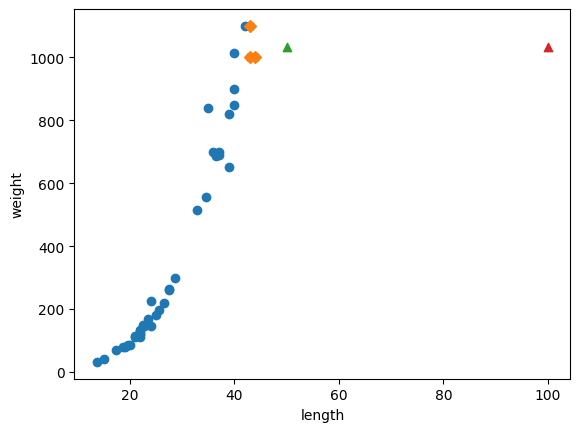

In [ ]:
plt.scatter(X_train,y_train)
plt.scatter(X_train[indexes],y_train[indexes],marker="D")
plt.scatter(50,1033,marker="^")
plt.scatter(100,1033,marker="^") ## knr의 한계=> knr은 가장 가까운 샘플을 찾아 타깃의 평균을 구하는데, 새로운 샘플이 훈련테스트의 범위에 벗어나면 엉뚱한 값을 예측할 수 있다.
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## 선형 회귀 

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()



In [19]:
lr=LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
lr.predict([[50]])

array([1241.83860323])

In [22]:
print("계수:",lr.coef_,"절편:",lr.intercept_)

계수: [39.01714496] 절편: -709.0186449535474


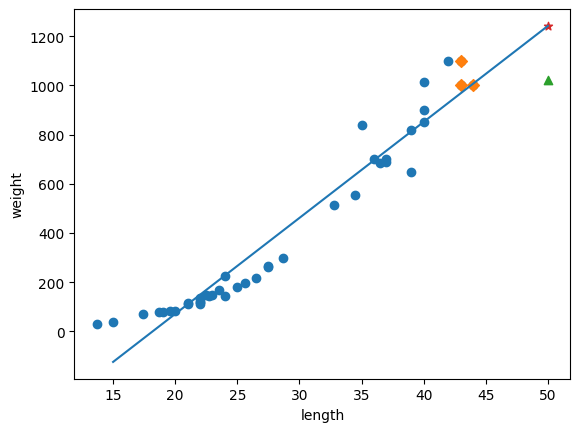

In [23]:
plt.scatter(X_train,y_train)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(X_train[indexes],y_train[indexes],marker="D")
plt.scatter(50,1022,marker="^")
plt.scatter(50,1241.8,marker="*")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [24]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9398463339976041
0.824750312331356
